In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pumpkins = pd.read_csv('../../US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [7]:
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package','Unit of Sale','High Price','Low Price']
print(len(new_columns))
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins.info()

9
<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 104 to 1429
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   City Name     108 non-null    int32
 1   Package       108 non-null    int32
 2   Variety       108 non-null    int32
 3   Low Price     108 non-null    int64
 4   High Price    108 non-null    int64
 5   Origin        108 non-null    int32
 6   Item Size     108 non-null    int32
 7   Color         108 non-null    int32
 8   Unit of Sale  108 non-null    int32
dtypes: int32(7), int64(2)
memory usage: 5.5 KB


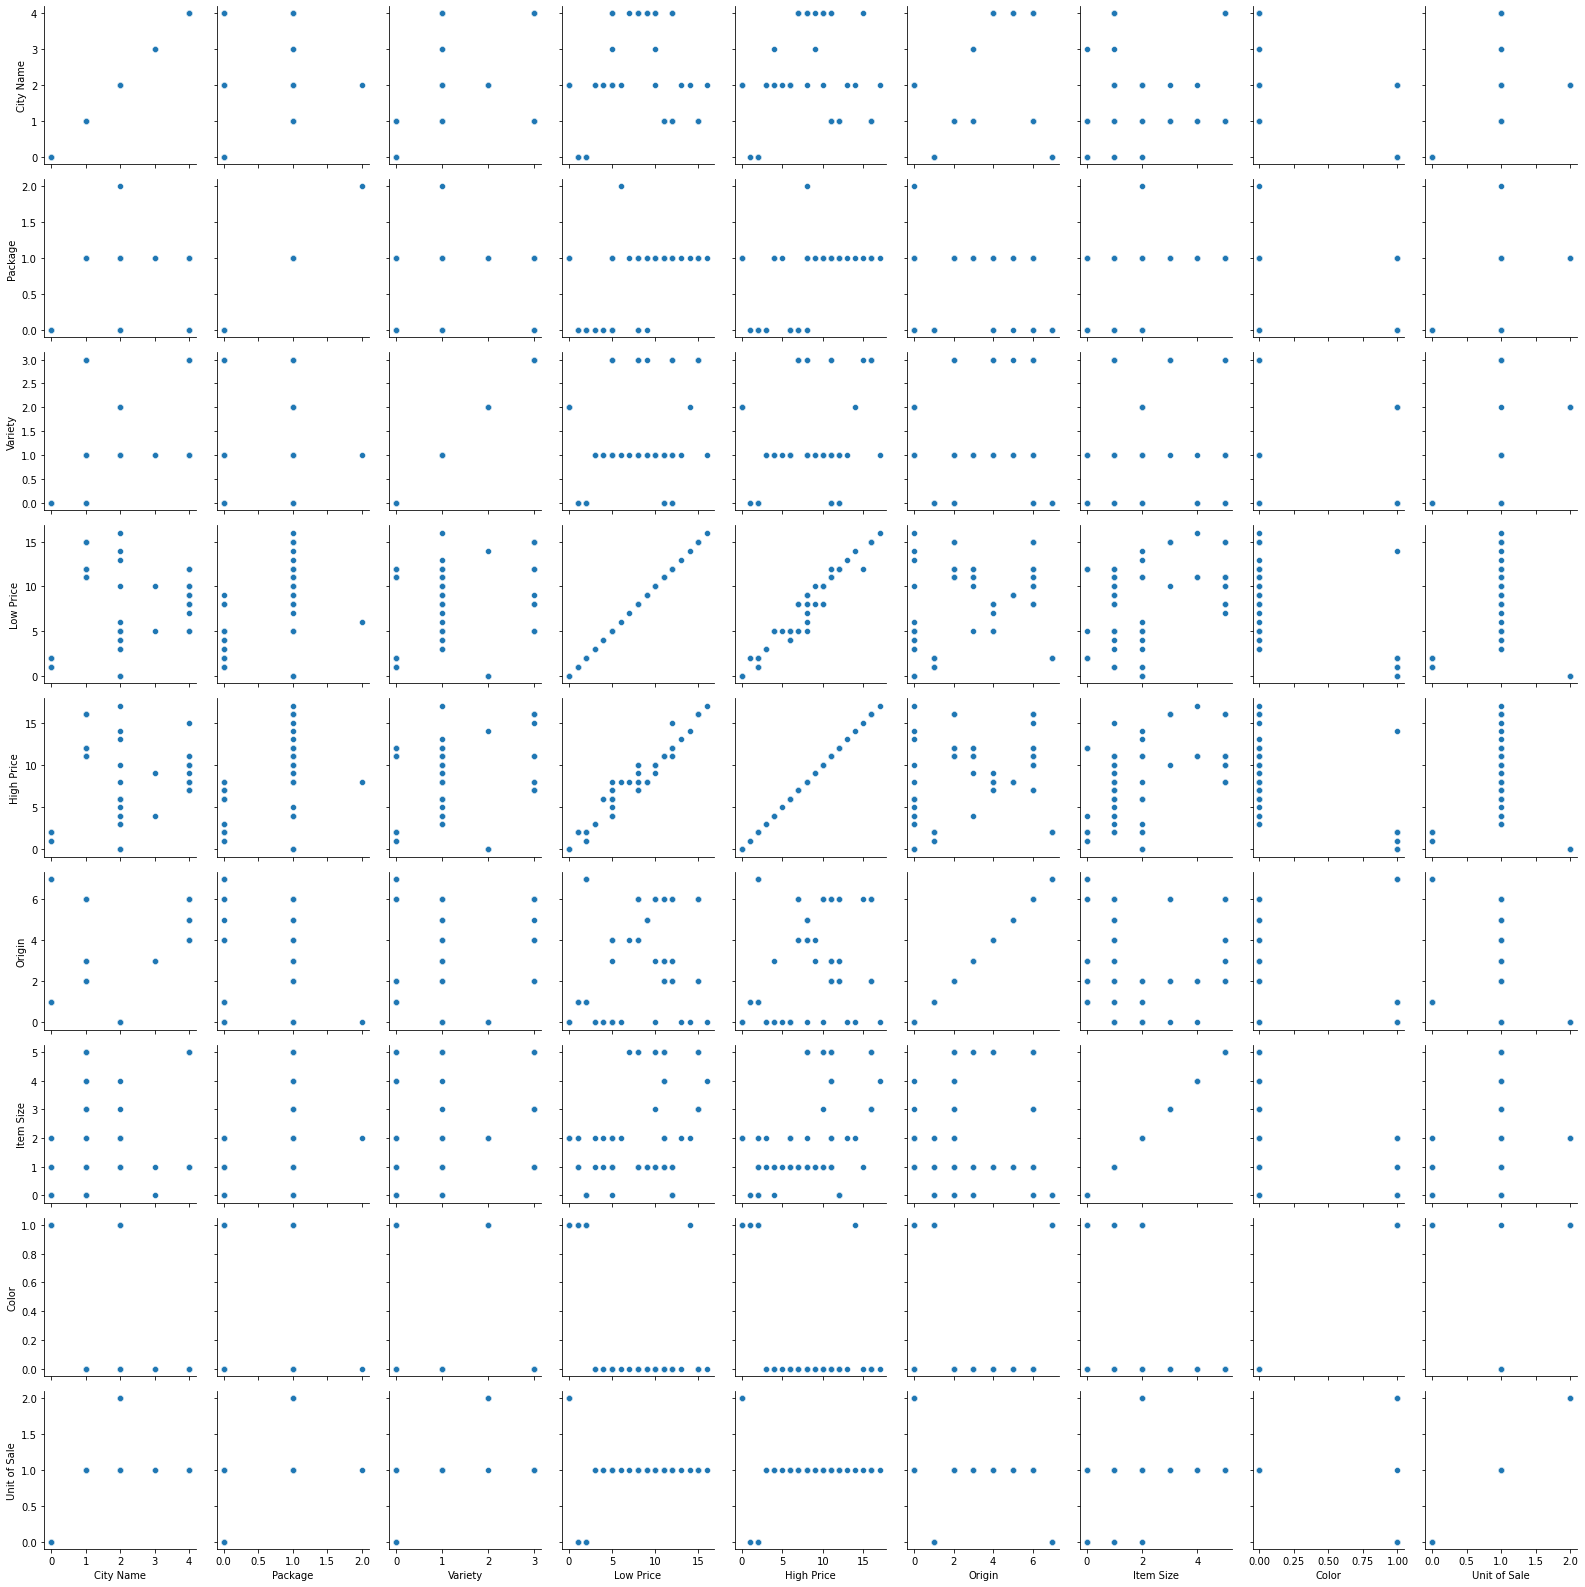

In [8]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

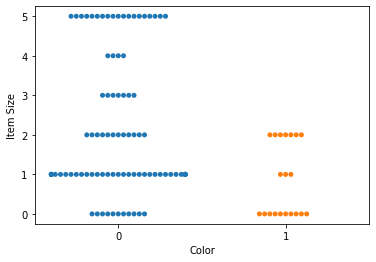

In [11]:
sns.swarmplot(data=new_pumpkins,x='Color',y='Item Size')

In [12]:
from sklearn.model_selection import train_test_split

selected_features = ['Origin','Item Size','Variety','City Name','Package','Unit of Sale','High Price','Low Price']
x = new_pumpkins[selected_features]
y = new_pumpkins['Color']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  classification_report

model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         5

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Predicted labels:  [0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
Accuracy:  1.0


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[17,  0],
       [ 0,  5]], dtype=int64)

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

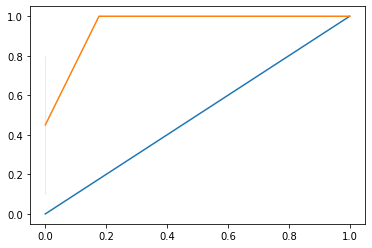

In [14]:
from sklearn.metrics import roc_auc_score,roc_curve

y_scores = model.predict_proba(x_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)


In [15]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

1.0


this idicates that the model is perfect.